In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("C:\\Users\\Asus\\Downloads\\data_elonmusk.csv", encoding="latin1")
data1 = data1.drop('row ID', axis='columns')
data1

,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk
...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk


In [3]:
data1.isna().sum()
#jumlah tweet yang dikemukakan oleh Elon Musk berjumlah 2693 
#jumlah retweet dari Elon Musk berjumlah 524

Tweet              0
Time               0
Retweet from    2693
User               0
dtype: int64

In [4]:
source = data1.loc[:,"Retweet from"].unique().size
print("Elon musks retweets from {n} sources (excluding NaN)".format(n = source-1))
retweets_source = data1.iloc[:,2].value_counts()
retweets_source

Elon musks retweets from 201 sources (excluding NaN)


SpaceX         109
Tesla           90
NASA            18
OpenAI          14
WIRED            9
              ... 
ycombinator      1
sama             1
sapinker         1
HodderBooks      1
neokoenig        1
Name: Retweet from, Length: 201, dtype: int64

In [5]:
#retweet terbanyak yang dilakukan Elon Musk pada tahun 2012-2017 adalah retweet ke akun @SpaceX
#retweet tersedikit yang dilakukan Elon Musk pada tahun 2012-2017 adalah retweet ke akun @neokoenig

In [6]:
data1.Time = pd.to_datetime(data1.Time)
data1["year"] = data1.Time.dt.year
data1["hour"] = data1.Time.dt.hour
data1.hour

0       17
1       10
2       10
3        9
4        9
        ..
3213     8
3214     8
3215     8
3216     8
3217    17
Name: hour, Length: 3218, dtype: int64

In [7]:
def fun(hour):
    if hour<=12 & hour >= 7:     
        hour = "morning"
    elif hour>12 & hour<= 20:
        hour = "afternon"
    else:
        hour = "night"
    return hour

data1.hour = data1.hour.apply(lambda x:fun(x) )
data1

,Tweet,Time,Retweet from,User,year,hour
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk,2017,afternon
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk,2017,afternon
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk,2017,afternon
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk,2017,afternon
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk,2017,afternon
...,...,...,...,...,...,...
3213,"@YOUSRC Amos's article was fair, but his edito...",2012-11-20 08:52:03,NaN,elonmusk,2012,morning
3214,These articles in Space News describe why Aria...,2012-11-20 08:38:31,NaN,elonmusk,2012,morning
3215,Was misquoted by BBC as saying Europe's rocket...,2012-11-20 08:30:44,NaN,elonmusk,2012,morning
3216,Just returned from a trip to London and Oxford...,2012-11-19 08:59:46,NaN,elonmusk,2012,morning


In [8]:
data1.hour.value_counts()

afternon    2704
night        345
morning      169
Name: hour, dtype: int64

<AxesSubplot:>

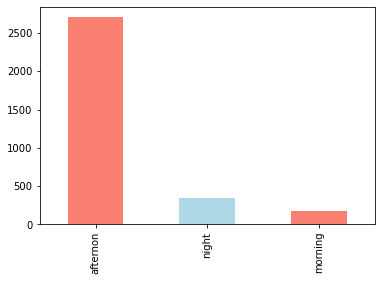

In [9]:
data1.hour.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [10]:
data1.year.value_counts()

2017    1083
2016     934
2013     479
2015     436
2014     231
2012      55
Name: year, dtype: int64

<AxesSubplot:>

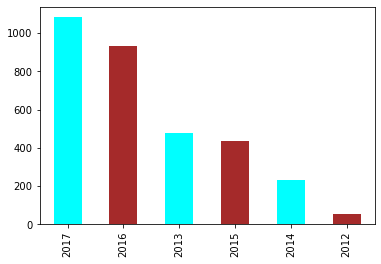

In [11]:
data1.year.value_counts().plot(kind="bar",color=["aqua","brown"])

In [12]:
#Elon Musk lebih banyak mengtweet pada siang hari dan paling sedikit pada pagi hari
#Elon Musk mengtweet terbanyak di tahun 2017 sejumlah 1083 tweet dan paling sedikit ditahun 2021 sejumlah 55 tweet

In [14]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
data1.describe()

,year
count,3218.000000
mean,2015.542573
std,1.470957
min,2012.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2017.000000


In [17]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [18]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()   

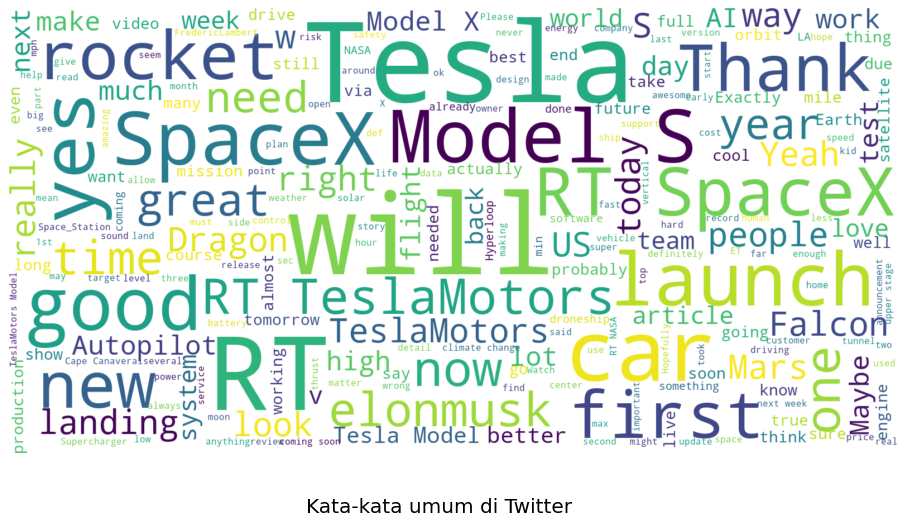

In [19]:
show_wordcloud(data1['Tweet'], title = 'Kata-kata umum di Twitter')

In [21]:
#Kata-kata yang paling sering muncul di akun twitter Elon Musk adalah Tesla, will,Model, RT dan SpaceX